In [9]:
#from intake-stac repo
%matplotlib inline
from pprint import pprint

from intake_stac import StacCatalog
cat = StacCatalog('https://storage.googleapis.com/pdd-stac/disasters/catalog.json')
display(list(cat))

['20170831_172754_101c',
 '2017831_195552_SS02',
 '20170831_195425_SS02',
 '20170831_162740_ssc1d1',
 'Houston-East-20170831-103f-100d-0f4f-RGB']

In [4]:
pprint(cat.metadata)

{'description': '[Planet Disaster Data](https://www.planet.com/disasterdata/) '
                'makes imagery available directly to the public, volunteers, '
                'humanitarian organizations, and other coordinating bodies in '
                'support of the International Charter for Space and Major '
                'Disasters. Data is released for individual disaster events, '
                'providing a 30 day window pre- and post-disaster. Imagery is '
                'provided under Creative Commons licenses, free of charge, '
                'with either CC-BY-SA or CC-BY-NC.',
 'stac_version': '0.6.0'}


In [5]:
cat['Houston-East-20170831-103f-100d-0f4f-RGB'].metadata

{'datetime': datetime.datetime(2017, 8, 31, 17, 24, 57, 555491, tzinfo=tzutc()),
 'provider': 'Planet',
 'license': 'CC-BY-SA',
 'eo:cloud_cover': 2,
 'eo:gsd': 3.7,
 'eo:sun_azimuth': 145.5,
 'eo:sun_elevation': 64.9,
 'eo:view_angle': 0.2,
 'pl:epsg_code': 32615,
 'pl:ground_control': True,
 'pl:instrument': 'PS2',
 'pl:provider': 'planetscope',
 'bbox': [-95.73737276800716,
  29.561332400220497,
  -95.05332428370095,
  30.157560439570304],
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-95.73737276800716, 30.14525788823348],
    [-95.06532619920118, 30.157560439570304],
    [-95.05332428370095, 29.57334931237589],
    [-95.7214758280382, 29.561332400220497],
    [-95.73737276800716, 30.14525788823348]]]},
 'date': datetime.date(2017, 8, 31),
 'catalog_dir': ''}

In [6]:
list(cat['Houston-East-20170831-103f-100d-0f4f-RGB'])

['thumbnail', 'mosaic']

In [7]:
tif = cat['Houston-East-20170831-103f-100d-0f4f-RGB']['thumbnail']
tiff_da = tif.to_dask() 
tiff_da

<xarray.DataArray (y: 552, x: 549, channel: 3)>
dask.array<shape=(552, 549, 3), dtype=uint8, chunksize=(552, 549, 3)>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 543 544 545 546 547 548 549 550 551
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 540 541 542 543 544 545 546 547 548
  * channel  (channel) int64 0 1 2

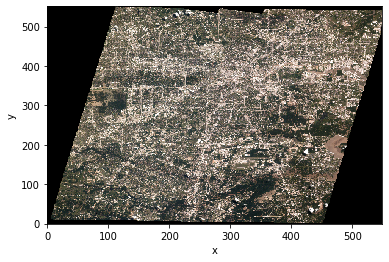

In [10]:
tiff_da.plot.imshow(rgb='channel')